### Singapore race ML Analysis

### Singapore Race Analysis-part:3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf

In [2]:
#REading singapore weather,constructors,details
df1=pd.read_csv('./intermediate_files/singalore_weather_constructor.csv',index_col=0)

In [3]:
df1.isna().any()

raceId             False
driverId           False
D_points           False
D-position         False
D_wins             False
race_year          False
race_round         False
race_name          False
constructorId      False
starting_grid      False
Ending_position    False
points_scored      False
laps_completed     False
statusId           False
D_age              False
con_points         False
con_position       False
Conwins            False
round              False
name               False
visibility         False
temperatureHigh    False
temperatureLow     False
windSpeed          False
windBearing        False
humidity           False
Top_15_position    False
dtype: bool

In [4]:
df_pit_stops=pd.read_csv('./Capstone_core_data/pit_stops.csv')

In [5]:
df_pit_stops.isna().any()

raceId          False
driverId        False
stop            False
lap             False
time            False
duration        False
milliseconds    False
dtype: bool

In [6]:
df_pit_stops.shape

(7436, 7)

In [7]:
df_pit_stops.columns=['raceId','driverId','#_of_stops','which_laps','what_time','duration','milliseconds']

In [8]:
df_pit_stops.head()

,raceId,driverId,#_of_stops,which_laps,what_time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [9]:
df_pit_stops=df_pit_stops.drop(['what_time','duration'],axis=1)

In [81]:
#df_temprary.groupby(['raceId','driverId']).D_points.sum()
df_pit_stops=df_pit_stops.groupby(['raceId','driverId']).milliseconds.mean().reset_index().rename(columns={'milliseconds':'averagetime_at_pitstop'})

#df2 = df_pit_stops.groupby(['raceId','driverId'], as_index=False)['average'].mean()

In [82]:
df_pit_stops.to_csv('./intermediate_files/average_pit_Stop.csv')

In [83]:
display(df_pit_stops)

,raceId,driverId,averagetime_at_pitstop
0,841,1,23213.0
1,841,2,24046.0
2,841,3,23716.0
3,841,4,24055.0
4,841,5,24865.0
...,...,...,...
3576,1030,841,22082.5
3577,1030,844,21485.5
3578,1030,846,22974.0
3579,1030,847,22272.0


In [13]:
df_pit_stops_average=pd.read_csv('./intermediate_files/average_pit_Stop.csv',index_col=0)

In [14]:
df_pit_stops_average.shape

(3581, 3)

In [15]:
df1.shape

(258, 27)

### Bringing in pit stop times of singapore race

### Merge 1:Singapore race pit stop timings

In [16]:
df_check_pit_Stops=pd.merge(df1,df_pit_stops_average,how='left',on=['raceId','driverId'])

In [17]:
df_check_pit_Stops.columns

Index(['raceId', 'driverId', 'D_points', 'D-position', 'D_wins', 'race_year',
       'race_round', 'race_name', 'constructorId', 'starting_grid',
       'Ending_position', 'points_scored', 'laps_completed', 'statusId',
       'D_age', 'con_points', 'con_position', 'Conwins', 'round', 'name',
       'visibility', 'temperatureHigh', 'temperatureLow', 'windSpeed',
       'windBearing', 'humidity', 'Top_15_position', 'averagetime_at_pitstop'],
      dtype='object')

In [18]:
df_check_pit_Stops.averagetime_at_pitstop.fillna(value=0, inplace=True)

In [19]:
df_check_pit_Stops.columns


Index(['raceId', 'driverId', 'D_points', 'D-position', 'D_wins', 'race_year',
       'race_round', 'race_name', 'constructorId', 'starting_grid',
       'Ending_position', 'points_scored', 'laps_completed', 'statusId',
       'D_age', 'con_points', 'con_position', 'Conwins', 'round', 'name',
       'visibility', 'temperatureHigh', 'temperatureLow', 'windSpeed',
       'windBearing', 'humidity', 'Top_15_position', 'averagetime_at_pitstop'],
      dtype='object')

In [20]:
df_check_pit_Stops=df_check_pit_Stops.drop(['round','name'],axis=1)

In [21]:
df_check_pit_Stops=df_check_pit_Stops[['raceId', 'driverId', 'D_points', 'D-position', 'D_wins', 'race_year',
       'race_round', 'race_name', 'constructorId', 'starting_grid',
       'Ending_position', 'points_scored', 'laps_completed', 'statusId',
       'D_age', 'con_points', 'con_position', 'Conwins',
       'visibility', 'temperatureHigh', 'temperatureLow', 'windSpeed',
       'windBearing', 'humidity', 'averagetime_at_pitstop','Top_15_position']]

In [22]:
df_check_pit_Stops.head(2)

,raceId,driverId,D_points,D-position,D_wins,race_year,race_round,race_name,constructorId,starting_grid,...,con_position,Conwins,visibility,temperatureHigh,temperatureLow,windSpeed,windBearing,humidity,averagetime_at_pitstop,Top_15_position
0,32,1,84.0,1,1,2008,15,Singapore Grand Prix,1,2,...,1,1,6.167,90.72,77.47,5.06,152.0,0.79,0.0,1
1,32,5,51.0,6,1,2008,15,Singapore Grand Prix,1,5,...,1,1,6.167,90.72,77.47,5.06,152.0,0.79,0.0,1


In [23]:
df_check_pit_Stops.shape

(258, 26)

In [25]:
df_check_pit_Stops.to_csv('./intermediate_files/analysis.csv')

### Bringing in qualifying round times of singapore race

In [26]:
df_q=pd.read_csv('./intermediate_files/converted_qualifying time.csv',index_col=0)

In [27]:
df_q.shape

(8220, 7)

In [28]:
df_q.columns

Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'position', 'q3'],
      dtype='object')

In [29]:
df_check_pit_Stops.columns

Index(['raceId', 'driverId', 'D_points', 'D-position', 'D_wins', 'race_year',
       'race_round', 'race_name', 'constructorId', 'starting_grid',
       'Ending_position', 'points_scored', 'laps_completed', 'statusId',
       'D_age', 'con_points', 'con_position', 'Conwins', 'visibility',
       'temperatureHigh', 'temperatureLow', 'windSpeed', 'windBearing',
       'humidity', 'averagetime_at_pitstop', 'Top_15_position'],
      dtype='object')

### Merge

In [30]:
df_analysis=pd.merge(df_check_pit_Stops,df_q,how='inner',on=['raceId', 'driverId'])

In [31]:
df_analysis.columns

Index(['raceId', 'driverId', 'D_points', 'D-position', 'D_wins', 'race_year',
       'race_round', 'race_name', 'constructorId_x', 'starting_grid',
       'Ending_position', 'points_scored', 'laps_completed', 'statusId',
       'D_age', 'con_points', 'con_position', 'Conwins', 'visibility',
       'temperatureHigh', 'temperatureLow', 'windSpeed', 'windBearing',
       'humidity', 'averagetime_at_pitstop', 'Top_15_position', 'qualifyId',
       'constructorId_y', 'number', 'position', 'q3'],
      dtype='object')

In [32]:
df_analysis=df_analysis.drop(['qualifyId','position','Conwins','constructorId_y','race_name'],axis=1)

In [33]:
df_analysis.columns

Index(['raceId', 'driverId', 'D_points', 'D-position', 'D_wins', 'race_year',
       'race_round', 'constructorId_x', 'starting_grid', 'Ending_position',
       'points_scored', 'laps_completed', 'statusId', 'D_age', 'con_points',
       'con_position', 'visibility', 'temperatureHigh', 'temperatureLow',
       'windSpeed', 'windBearing', 'humidity', 'averagetime_at_pitstop',
       'Top_15_position', 'number', 'q3'],
      dtype='object')

In [34]:
df_analysis=df_analysis[['raceId', 'driverId', 'D_points', 'D-position', 'D_wins', 'race_year',
       'race_round', 'constructorId_x', 'starting_grid', 'Ending_position','points_scored',
       'laps_completed', 'statusId', 'D_age', 'con_points', 'con_position',
       'visibility', 'temperatureHigh', 'temperatureLow', 'windSpeed',
       'windBearing', 'humidity', 'averagetime_at_pitstop', 
       'number', 'q3','Top_15_position']]

In [35]:
df_analysis.columns=['raceId', 'driverId', 'D_points', 'D-position', 'D_wins', 'race_year',
       'race_round', 'constructorId_x', 'starting_grid', 'Ending_position','points_scored',
       'laps_completed', 'statusId', 'D_age', 'con_points', 'con_position',
       'visibility', 'temperatureHigh', 'temperatureLow', 'windSpeed',
       'windBearing', 'humidity', 'averagetime_at_pitstop', 
       'number', 'q3','is_win']

In [36]:
pd.options.display.max_columns=26
df_analysis.to_csv('./intermediate_files/df_analysis.csv')

In [37]:
df_analysis.columns

Index(['raceId', 'driverId', 'D_points', 'D-position', 'D_wins', 'race_year',
       'race_round', 'constructorId_x', 'starting_grid', 'Ending_position',
       'points_scored', 'laps_completed', 'statusId', 'D_age', 'con_points',
       'con_position', 'visibility', 'temperatureHigh', 'temperatureLow',
       'windSpeed', 'windBearing', 'humidity', 'averagetime_at_pitstop',
       'number', 'q3', 'is_win'],
      dtype='object')

In [38]:
df_analysis=df_analysis[['raceId', 'driverId','D_points','D_wins', 'race_year',
       'constructorId_x', 'starting_grid', 'Ending_position',
        'laps_completed', 'statusId', 'D_age', 'con_points',
       'con_position', 'visibility', 'temperatureHigh', 'temperatureLow',
       'windSpeed', 'windBearing', 'humidity', 'averagetime_at_pitstop',
       'number', 'q3', 'is_win']]

In [57]:
df_analysis.to_csv('./intermediate_files/df_analysis.csv')

## Re-start here

### Calculation variable influential factor(VIF) for F1 race

In [39]:
df_analysis_VIF=df_analysis[['raceId', 'driverId','D_points','D_wins',
       'constructorId_x', 'starting_grid', 'Ending_position',
        'laps_completed', 'statusId', 'D_age', 'con_points',
       'con_position', 'visibility', 'temperatureHigh', 'temperatureLow',
       'windSpeed', 'windBearing', 'humidity', 'averagetime_at_pitstop',
       'number', 'q3', 'is_win']]

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
X = df_analysis.iloc[:, :-1]
old_X = X.copy()

VIF_list = []
for i in range(X.shape[1]):
    VIF_list.append(variance_inflation_factor(X.values, i))

VIF_series = pd.Series(VIF_list, index=X.columns)
VIF_series.sort_values(ascending=False)

race_year                 46792.826945
temperatureHigh           12426.440444
q3                         7435.065082
temperatureLow             5232.697548
humidity                   2568.742161
visibility                  108.024638
D_age                        85.841512
raceId                       53.377412
laps_completed               46.129828
windBearing                  34.622891
windSpeed                    29.242082
averagetime_at_pitstop       28.676007
con_points                   27.434383
D_points                     27.429007
con_position                 27.270459
Ending_position              17.682920
starting_grid                17.630604
driverId                      6.055914
D_wins                        3.640916
number                        2.622182
constructorId_x               2.323873
statusId                      1.617651
dtype: float64

In [42]:
df_sorted=VIF_series.sort_values(ascending=False)

In [43]:
df = pd.DataFrame({'variables':VIF_series.index, 'VIF':VIF_series.values})

In [44]:
df_sorted.head()

race_year          46792.826945
temperatureHigh    12426.440444
q3                  7435.065082
temperatureLow      5232.697548
humidity            2568.742161
dtype: float64

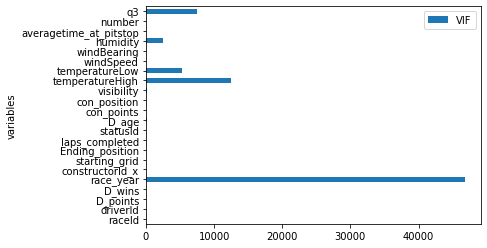

In [45]:
df.plot(x="variables", y=["VIF"], kind="barh")

**We have some very high VIFs here, but I do want to run the model with these factors and see if they cause any co-linearity related problems (large p-values, large standard errors)**

In [46]:
df_coefficients=df_analysis.corrwith(df_analysis['is_win'])

In [47]:
df_coefficients=pd.DataFrame(df_coefficients,columns=['is_win'])

In [48]:
df_coefficients.reset_index()

,index,is_win
0,raceId,-0.008878
1,driverId,-0.071991
2,D_points,0.392740
3,D_wins,0.297686
4,race_year,0.036566
5,constructorId_x,-0.293143
6,starting_grid,-0.460172
7,Ending_position,-0.858222
8,laps_completed,0.531555
9,statusId,-0.355055


In [49]:
df_test = pd.DataFrame({'variables':df_coefficients.index, 'Is_win':df_coefficients.is_win})

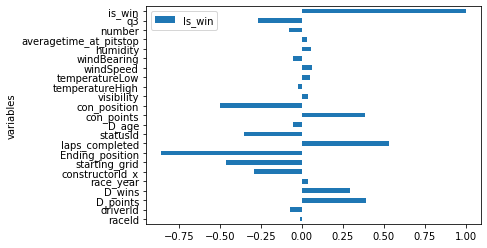

In [51]:
df_test.plot(x="variables", y="Is_win", kind="barh")


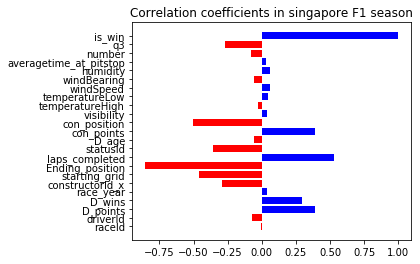

In [52]:
bar_names = df_test['variables']
bar_heights = df_test['Is_win']

bar_colors = np.where(bar_heights > 0.0, "blue", "red")

plt.figure(figsize=(5.0, 4.0))
plt.barh(bar_names, bar_heights, color=bar_colors)
plt.title("Correlation coefficients in singapore F1 season")
plt.savefig('Correlation_coefficients_in_singapore_F1_season.png');
plt.show()

In [53]:
X = df_analysis.iloc[:,:-1]
y = df_analysis.iloc[:,-1]

In [54]:
p_value_list=[]

for i in X.columns:
    
    p_value=stats.pearsonr(X[i],y)
    
    p_value_list.append(p_value)

In [55]:
df_p=pd.DataFrame(p_value_list, columns = ['correlation coefficient','p_value'])

In [56]:
df_p

,correlation coefficient,p_value
0,-0.008878,8.878074e-01
1,-0.071991,2.520231e-01
2,0.392740,7.823313e-11
3,0.297686,1.295196e-06
4,0.036566,5.610844e-01
5,-0.293143,1.905723e-06
6,-0.460172,9.085078e-15
7,-0.858222,3.056591e-75
8,0.531555,5.342963e-20
9,-0.355055,5.441311e-09


### Analysis on Practice time for Singapore Grand Prix for 2019

In [58]:
import numpy as np
import pandas as pd

### These 3 files have been created using web scaper from F1 autosport web site

In [60]:
df_p1 = pd.read_csv('./singapore_practice_times_2019/singapore_practice_1.csv',index_col=0)

In [61]:
df_p2=pd.read_csv('./singapore_practice_times_2019/singapore_practice_2.csv',index_col=0)

In [62]:
df_p3=pd.read_csv('./singapore_practice_times_2019/singapore_practice_3.csv',index_col=0)

In [63]:
df_p2.head()

,No,Driver,Car,Time,Gap,Laps
Pos,,,,,,
1,44,LewisHamilton,Mercedes,01:38.8,NaN,29
2,33,MaxVerstappen,Red Bull Racing Honda,01:39.0,+0.184s,29
3,5,SebastianVettel,Ferrari,01:39.6,+0.818s,31
4,77,ValtteriBottas,Mercedes,01:39.9,+1.121s,30
5,23,AlexanderAlbon,Red Bull Racing Honda,01:39.9,+1.170s,30


In [64]:
df_p3.head()

,No,Driver,Car,Time,Gap,Laps
Pos,,,,,,
1,16,CharlesLeclerc,Ferrari,01:38.2,0,15
2,44,LewisHamilton,Mercedes,01:38.4,+0.207s,15
3,5,SebastianVettel,Ferrari,01:38.8,+0.619s,13
4,77,ValtteriBottas,Mercedes,01:38.9,+0.693s,16
5,23,AlexanderAlbon,Red Bull Racing Honda,01:39.3,+1.066s,14


In [65]:
df_p1.Gap.fillna(value=0, inplace=True)
df_p2.Gap.fillna(value=0, inplace=True)
df_p3.Gap.fillna(value=0, inplace=True)

In [66]:
df_p1.head()

,No,Driver,Car,Time,Gap,Laps
Pos,,,,,,
1,33,MaxVerstappen,Red Bull Racing Honda,01:40.3,0,22
2,5,SebastianVettel,Ferrari,01:40.4,+0.167s,23
3,44,LewisHamilton,Mercedes,01:40.9,+0.666s,26
4,77,ValtteriBottas,Mercedes,01:41.3,+1.077s,14
5,23,AlexanderAlbon,Red Bull Racing Honda,01:41.5,+1.208s,24


In [67]:
df_p2.head()

,No,Driver,Car,Time,Gap,Laps
Pos,,,,,,
1,44,LewisHamilton,Mercedes,01:38.8,0,29
2,33,MaxVerstappen,Red Bull Racing Honda,01:39.0,+0.184s,29
3,5,SebastianVettel,Ferrari,01:39.6,+0.818s,31
4,77,ValtteriBottas,Mercedes,01:39.9,+1.121s,30
5,23,AlexanderAlbon,Red Bull Racing Honda,01:39.9,+1.170s,30


In [68]:
df_p3.head()

,No,Driver,Car,Time,Gap,Laps
Pos,,,,,,
1,16,CharlesLeclerc,Ferrari,01:38.2,0,15
2,44,LewisHamilton,Mercedes,01:38.4,+0.207s,15
3,5,SebastianVettel,Ferrari,01:38.8,+0.619s,13
4,77,ValtteriBottas,Mercedes,01:38.9,+0.693s,16
5,23,AlexanderAlbon,Red Bull Racing Honda,01:39.3,+1.066s,14


In [69]:
df_p1['Time']=pd.to_datetime(df_p1['Time'])

In [70]:
df_p1['Time'] = df_p1['Time'].dt.time

In [71]:
df_p1.to_csv('./singapore_practice_times_2019/practice_Modi_1.csv')

In [72]:
def convert_to_seonds(value):
            b = value.split(':')
            return  int(b[0])*3600 + int(b[1])*60 + int(b[2])

In [73]:
df_pr1= pd.read_csv('./singapore_practice_times_2019/practice_Modi_1.csv',
                     converters={'Time': convert_to_seonds})

In [74]:
df_pr1.head(2)

,Pos,No,Driver,Car,Time,Gap,Laps
0,1,33,MaxVerstappen,Red Bull Racing Honda,6018,0,22
1,2,5,SebastianVettel,Ferrari,6024,+0.167s,23


In [75]:
df_pr1.columns

Index(['Pos', 'No', 'Driver', 'Car', 'Time', 'Gap', 'Laps'], dtype='object')

In [76]:
df_pr1.columns=['P1_Pos', 'No', 'Driver', 'Car', 'Practice_Time1', 'Gap_in_Practice_1_time', 'p1_Laps_90_min']

In [77]:
#df_pr1=df_pr1.drop(['Driver','Car'],axis=1)

In [78]:
df_pr1.head(2)

,P1_Pos,No,Driver,Car,Practice_Time1,Gap_in_Practice_1_time,p1_Laps_90_min
0,1,33,MaxVerstappen,Red Bull Racing Honda,6018,0,22
1,2,5,SebastianVettel,Ferrari,6024,+0.167s,23


In [79]:
df_p2['Time']=pd.to_datetime(df_p2['Time'])

In [80]:
df_p2['Time'] = df_p2['Time'].dt.time

In [81]:
df_p2.to_csv('./singapore_practice_times_2019/practice_Modi_2.csv')

In [82]:
def convert_to_seonds(value):
            b = value.split(':')
            return  int(b[0])*3600 + int(b[1])*60 + int(b[2])

In [83]:
df_pr2= pd.read_csv('./singapore_practice_times_2019/practice_Modi_2.csv',
                     converters={'Time': convert_to_seonds})

In [84]:
df_pr2.head(2)

,Pos,No,Driver,Car,Time,Gap,Laps
0,1,44,LewisHamilton,Mercedes,5928,0,29
1,2,33,MaxVerstappen,Red Bull Racing Honda,5940,+0.184s,29


In [85]:
df_pr2.columns

Index(['Pos', 'No', 'Driver', 'Car', 'Time', 'Gap', 'Laps'], dtype='object')

In [86]:
df_pr2.columns=['P2_Pos', 'No', 'Driver', 'Car', 'Practice_Time2', 'Gap_in_Practice_2_time', 'p2_Laps_90_min']

In [87]:
#df_pr2=df_pr2.drop(['Driver','Car'],axis=1)

In [88]:
df_pr2.columns

Index(['P2_Pos', 'No', 'Driver', 'Car', 'Practice_Time2',
       'Gap_in_Practice_2_time', 'p2_Laps_90_min'],
      dtype='object')

In [89]:
df_p3['Time']=pd.to_datetime(df_p3['Time'])

In [90]:
df_p3['Time'] = df_p3['Time'].dt.time

In [91]:
df_p3.to_csv('./singapore_practice_times_2019/practice_Modi_3.csv')

In [92]:
def convert_to_seonds(value):
            b = value.split(':')
            return  int(b[0])*3600 + int(b[1])*60 + int(b[2])

In [93]:
df_pr3= pd.read_csv('./singapore_practice_times_2019/practice_Modi_3.csv',
                     converters={'Time': convert_to_seonds})

In [94]:
df_pr3.head(2)

,Pos,No,Driver,Car,Time,Gap,Laps
0,1,16,CharlesLeclerc,Ferrari,5892,0,15
1,2,44,LewisHamilton,Mercedes,5904,+0.207s,15


In [95]:
df_pr3.columns

Index(['Pos', 'No', 'Driver', 'Car', 'Time', 'Gap', 'Laps'], dtype='object')

In [96]:
df_pr3.columns=['P3_Pos','No','Driver','Car','Practice_Time3','Gap_in_Practice_3_time','p3_Laps_90_min']

In [97]:
df_pr3=df_pr3.drop(['Driver','Car'],axis=1)

In [98]:
df_pr1.head()

,P1_Pos,No,Driver,Car,Practice_Time1,Gap_in_Practice_1_time,p1_Laps_90_min
0,1,33,MaxVerstappen,Red Bull Racing Honda,6018,0,22
1,2,5,SebastianVettel,Ferrari,6024,+0.167s,23
2,3,44,LewisHamilton,Mercedes,6054,+0.666s,26
3,4,77,ValtteriBottas,Mercedes,6078,+1.077s,14
4,5,23,AlexanderAlbon,Red Bull Racing Honda,6090,+1.208s,24


In [99]:
df_pr2.head()

,P2_Pos,No,Driver,Car,Practice_Time2,Gap_in_Practice_2_time,p2_Laps_90_min
0,1,44,LewisHamilton,Mercedes,5928,0,29
1,2,33,MaxVerstappen,Red Bull Racing Honda,5940,+0.184s,29
2,3,5,SebastianVettel,Ferrari,5976,+0.818s,31
3,4,77,ValtteriBottas,Mercedes,5994,+1.121s,30
4,5,23,AlexanderAlbon,Red Bull Racing Honda,5994,+1.170s,30


In [100]:
df_pr2.columns

Index(['P2_Pos', 'No', 'Driver', 'Car', 'Practice_Time2',
       'Gap_in_Practice_2_time', 'p2_Laps_90_min'],
      dtype='object')

In [101]:
df_practice_temp1_2 = pd.merge(df_pr1,df_pr2,how = 'inner', on='No')

In [102]:
df_practice_temp1_2.head()

,P1_Pos,No,Driver_x,Car_x,Practice_Time1,Gap_in_Practice_1_time,p1_Laps_90_min,P2_Pos,Driver_y,Car_y,Practice_Time2,Gap_in_Practice_2_time,p2_Laps_90_min
0,1,33,MaxVerstappen,Red Bull Racing Honda,6018,0,22,2,MaxVerstappen,Red Bull Racing Honda,5940,+0.184s,29
1,2,5,SebastianVettel,Ferrari,6024,+0.167s,23,3,SebastianVettel,Ferrari,5976,+0.818s,31
2,3,44,LewisHamilton,Mercedes,6054,+0.666s,26,1,LewisHamilton,Mercedes,5928,0,29
3,4,77,ValtteriBottas,Mercedes,6078,+1.077s,14,4,ValtteriBottas,Mercedes,5994,+1.121s,30
4,5,23,AlexanderAlbon,Red Bull Racing Honda,6090,+1.208s,24,5,AlexanderAlbon,Red Bull Racing Honda,5994,+1.170s,30


In [103]:
df_practice_temp_1_2_3 = pd.merge(df_practice_temp1_2,df_pr3,how = 'inner', on='No')

In [104]:
df_practice_temp_1_2_3.columns

Index(['P1_Pos', 'No', 'Driver_x', 'Car_x', 'Practice_Time1',
       'Gap_in_Practice_1_time', 'p1_Laps_90_min', 'P2_Pos', 'Driver_y',
       'Car_y', 'Practice_Time2', 'Gap_in_Practice_2_time', 'p2_Laps_90_min',
       'P3_Pos', 'Practice_Time3', 'Gap_in_Practice_3_time', 'p3_Laps_90_min'],
      dtype='object')

In [105]:
df_practice_temp_1_2_3=df_practice_temp_1_2_3[['P1_Pos','P2_Pos','P3_Pos','No','Practice_Time1','Practice_Time2','Practice_Time3',
                                'Gap_in_Practice_1_time',
                                'Gap_in_Practice_2_time',
                                'Gap_in_Practice_3_time',
                                'p1_Laps_90_min','p2_Laps_90_min', 'p3_Laps_90_min']]
      

In [106]:
df_practice_temp_1_2_3.head()

,P1_Pos,P2_Pos,P3_Pos,No,Practice_Time1,Practice_Time2,Practice_Time3,Gap_in_Practice_1_time,Gap_in_Practice_2_time,Gap_in_Practice_3_time,p1_Laps_90_min,p2_Laps_90_min,p3_Laps_90_min
0,1,2,6,33,6018,5940,5964,0,+0.184s,+1.174s,22,29,9
1,2,3,3,5,6024,5976,5928,+0.167s,+0.818s,+0.619s,23,31,13
2,3,1,2,44,6054,5928,5904,+0.666s,0,+0.207s,26,29,15
3,4,4,4,77,6078,5994,5934,+1.077s,+1.121s,+0.693s,14,30,16
4,5,5,5,23,6090,5994,5958,+1.208s,+1.170s,+1.066s,24,30,14


In [107]:
df_practice_temp_1_2_3.shape

(19, 13)

In [108]:
df_practice_temp_1_2_3.isna().any()

P1_Pos                    False
P2_Pos                    False
P3_Pos                    False
No                        False
Practice_Time1            False
Practice_Time2            False
Practice_Time3            False
Gap_in_Practice_1_time    False
Gap_in_Practice_2_time    False
Gap_in_Practice_3_time    False
p1_Laps_90_min            False
p2_Laps_90_min            False
p3_Laps_90_min            False
dtype: bool

### The following dataframe contains singapore analysis data(driver standings and constructor standings,results,weather)
But we want 2019 data from this data frame to merge with practice times of 2019.

In [109]:
df_singapore_2019=df_analysis.loc[(df_analysis['race_year']==2019)]

In [110]:
# singapore 2019 other data
df_singapore_2019.columns

Index(['raceId', 'driverId', 'D_points', 'D_wins', 'race_year',
       'constructorId_x', 'starting_grid', 'Ending_position', 'laps_completed',
       'statusId', 'D_age', 'con_points', 'con_position', 'visibility',
       'temperatureHigh', 'temperatureLow', 'windSpeed', 'windBearing',
       'humidity', 'averagetime_at_pitstop', 'number', 'q3', 'is_win'],
      dtype='object')

In [111]:
# singapore 2019 practice time
df_practice_temp_1_2_3.columns

Index(['P1_Pos', 'P2_Pos', 'P3_Pos', 'No', 'Practice_Time1', 'Practice_Time2',
       'Practice_Time3', 'Gap_in_Practice_1_time', 'Gap_in_Practice_2_time',
       'Gap_in_Practice_3_time', 'p1_Laps_90_min', 'p2_Laps_90_min',
       'p3_Laps_90_min'],
      dtype='object')

In [112]:
df_race=pd.read_csv('./Capstone_core_data/races.csv')

In [113]:
df_race.head(2)

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...


In [114]:
df_standings=pd.read_csv('./Capstone_core_data/driver_standings.csv')

In [115]:
df_standings.head(2)

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0


In [116]:
df_drivers=pd.read_csv('./Capstone_core_data/drivers.csv')

In [117]:
df_drivers.head(2)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld


In [118]:
df_drivers.columns

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [119]:
df_drivers.columns=['driverId', 'driverRef', 'No', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url']

In [120]:
df_drivers.columns

Index(['driverId', 'driverRef', 'No', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [121]:
df_singapore_2019.columns

Index(['raceId', 'driverId', 'D_points', 'D_wins', 'race_year',
       'constructorId_x', 'starting_grid', 'Ending_position', 'laps_completed',
       'statusId', 'D_age', 'con_points', 'con_position', 'visibility',
       'temperatureHigh', 'temperatureLow', 'windSpeed', 'windBearing',
       'humidity', 'averagetime_at_pitstop', 'number', 'q3', 'is_win'],
      dtype='object')

In [122]:
df_singapore=pd.merge(df_singapore_2019,df_drivers,how='inner',on='driverId')

In [123]:
df_singapore=df_singapore[['raceId', 'driverId', 'D_points', 'D_wins', 'race_year',
       'constructorId_x', 'starting_grid', 'Ending_position', 'laps_completed',
       'statusId', 'D_age', 'con_points', 'con_position', 'visibility',
       'temperatureHigh', 'temperatureLow', 'windSpeed', 'windBearing',
       'humidity', 'averagetime_at_pitstop', 'number', 'q3', 'is_win',
       'No', 'forename', 'surname','nationality',
       ]]

In [124]:
df_singapore['No']=df_singapore['No'].astype(int)

In [125]:
# merge both files
df_final_singapore=pd.merge(df_singapore,df_practice_temp_1_2_3,how='inner',on='No')

In [126]:
df_final_singapore.columns

Index(['raceId', 'driverId', 'D_points', 'D_wins', 'race_year',
       'constructorId_x', 'starting_grid', 'Ending_position', 'laps_completed',
       'statusId', 'D_age', 'con_points', 'con_position', 'visibility',
       'temperatureHigh', 'temperatureLow', 'windSpeed', 'windBearing',
       'humidity', 'averagetime_at_pitstop', 'number', 'q3', 'is_win', 'No',
       'forename', 'surname', 'nationality', 'P1_Pos', 'P2_Pos', 'P3_Pos',
       'Practice_Time1', 'Practice_Time2', 'Practice_Time3',
       'Gap_in_Practice_1_time', 'Gap_in_Practice_2_time',
       'Gap_in_Practice_3_time', 'p1_Laps_90_min', 'p2_Laps_90_min',
       'p3_Laps_90_min'],
      dtype='object')

In [127]:
df_final_singapore=df_final_singapore[['driverId', 'D_points', 'D_wins',
       'constructorId_x', 'starting_grid', 'Ending_position', 'laps_completed',
         'con_points', 'con_position', 'visibility',
       'temperatureHigh', 'temperatureLow', 'windSpeed', 'windBearing',
       'humidity', 'averagetime_at_pitstop','q3', 'is_win', 
       'forename', 'surname', 'P1_Pos', 'P2_Pos', 'P3_Pos',
       'Practice_Time1', 'Practice_Time2', 'Practice_Time3',
       'Gap_in_Practice_1_time', 'Gap_in_Practice_2_time',
       'Gap_in_Practice_3_time', 'p1_Laps_90_min', 'p2_Laps_90_min',
       'p3_Laps_90_min']]

In [128]:
df_final_singapore.head(2)

,driverId,D_points,D_wins,constructorId_x,starting_grid,Ending_position,laps_completed,con_points,con_position,visibility,temperatureHigh,temperatureLow,windSpeed,...,surname,P1_Pos,P2_Pos,P3_Pos,Practice_Time1,Practice_Time2,Practice_Time3,Gap_in_Practice_1_time,Gap_in_Practice_2_time,Gap_in_Practice_3_time,p1_Laps_90_min,p2_Laps_90_min,p3_Laps_90_min
0,822,231.0,1,131,5,5,61,527.0,1,10.0,90.34,79.85,10.33,...,Bottas,4,4,4,6078,5994,5934,+1.077s,+1.121s,+0.693s,14,30,16
1,1,296.0,1,131,2,4,61,527.0,1,10.0,90.34,79.85,10.33,...,Hamilton,3,1,2,6054,5928,5904,+0.666s,0,+0.207s,26,29,15


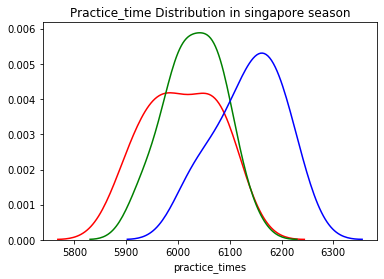

In [129]:
import seaborn as sns
plt.figure()
sns.distplot(df_final_singapore["Practice_Time3"], hist=False, color="r")
sns.distplot(df_final_singapore["Practice_Time2"], hist=False, color="g")
sns.distplot(df_final_singapore["Practice_Time1"], hist=False, color="b")
plt.xlabel("practice_times")
plt.title("Practice_time Distribution in singapore season")
plt.show()
plt.close()

In [130]:
df_plots=df_final_singapore[[ 'driverId','D_points','visibility',
       'temperatureHigh', 'temperatureLow', 'windSpeed', 'windBearing',
       'humidity', 'averagetime_at_pitstop','q3','Practice_Time1', 'Practice_Time2', 'Practice_Time3']]

In [131]:
df_plots



,driverId,D_points,visibility,temperatureHigh,temperatureLow,windSpeed,windBearing,humidity,averagetime_at_pitstop,q3,Practice_Time1,Practice_Time2,Practice_Time3
0,822,231.0,10.0,90.34,79.85,10.33,121.0,0.79,29234.0,5828,6078,5994,5934
1,1,296.0,10.0,90.34,79.85,10.33,121.0,0.79,28930.0,5784,6054,5928,5904
2,830,200.0,10.0,90.34,79.85,10.33,121.0,0.79,28846.0,5808,6018,5940,5964
3,848,42.0,10.0,90.34,79.85,10.33,121.0,0.79,28606.0,5844,6090,5994,5958
4,20,194.0,10.0,90.34,79.85,10.33,121.0,0.79,29384.0,5786,6024,5976,5928
5,844,200.0,10.0,90.34,79.85,10.33,121.0,0.79,29168.0,5773,6216,6000,5892
6,825,18.0,10.0,90.34,79.85,10.33,121.0,0.79,30159.5,5979,6192,6096,6090
7,154,8.0,10.0,90.34,79.85,10.33,121.0,0.79,36516.0,6016,6156,6084,6090
8,807,33.0,10.0,90.34,79.85,10.33,121.0,0.79,29357.5,5895,6108,6018,6006
9,8,31.0,10.0,90.34,79.85,10.33,121.0,0.79,29992.0,5931,6168,6072,6060


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


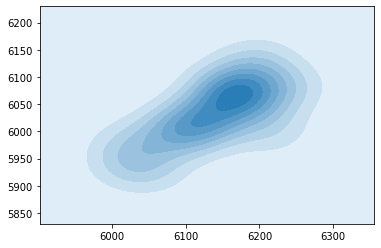

In [132]:
sns.kdeplot(df_plots[[
        'Practice_Time1', 'Practice_Time2', 'Practice_Time3']], shade=True)

In [133]:
df_analysis.to_csv('./intermediate_files/final_dataframe_singapore_analysis.csv')